In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from json import load, loads
from sklearn.datasets import load_iris
dataset=load_iris()

In [3]:
columns=dataset.feature_names   #columns

In [4]:
data=dataset     #data

In [5]:
import pandas as pd
df=pd.DataFrame(dataset.data,columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["target"]=data.target
#0-->setosa
#1-->versicolor
#2-->virginica

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

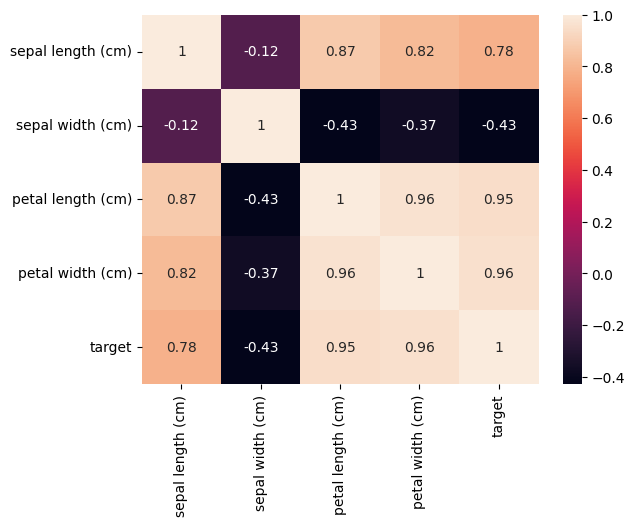

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


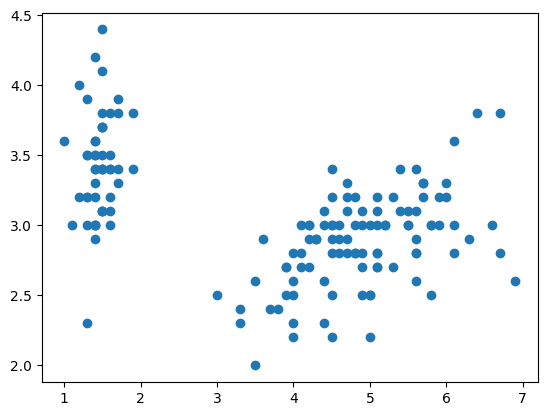

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df["petal length (cm)"],df["sepal width (cm)"])

<Axes: >

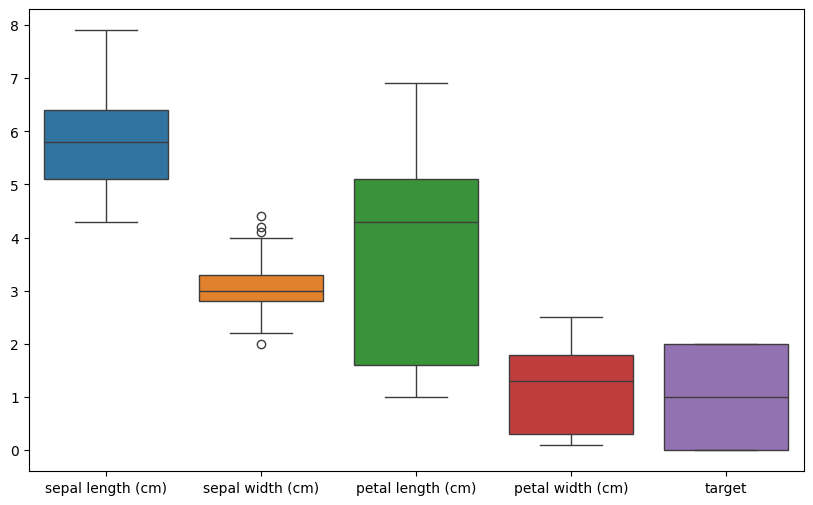

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [18]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="mad")
df["sepal width (cm)"]=win.fit_transform(df[["sepal width (cm)"]])

<Axes: >

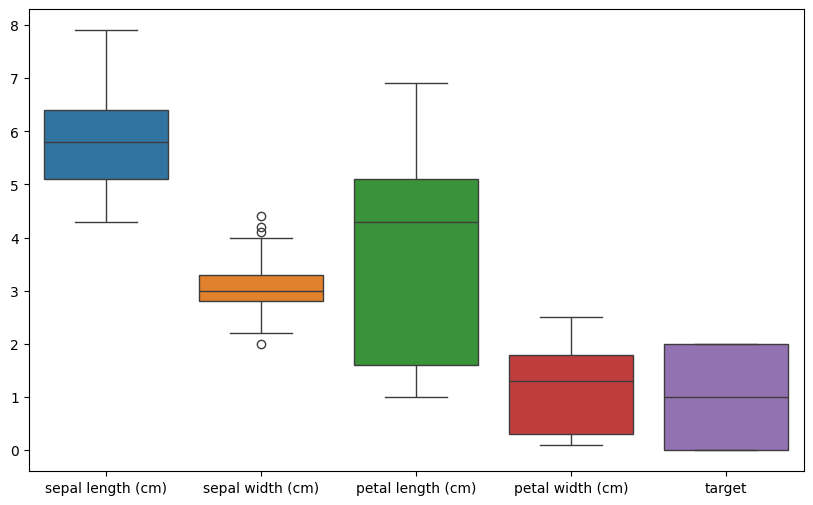

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


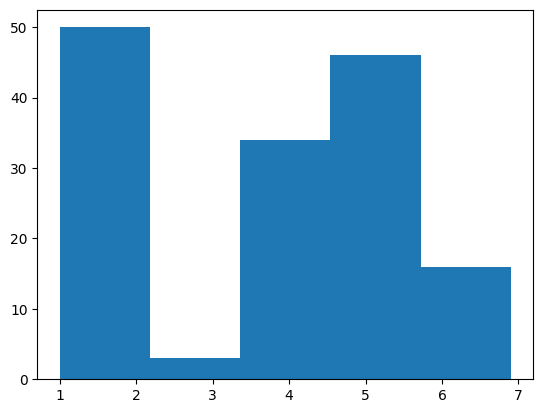

In [21]:
import matplotlib.pyplot as plt
plt.hist(df["petal length (cm)"],bins=5)
plt.show()

<BarContainer object of 149 artists>

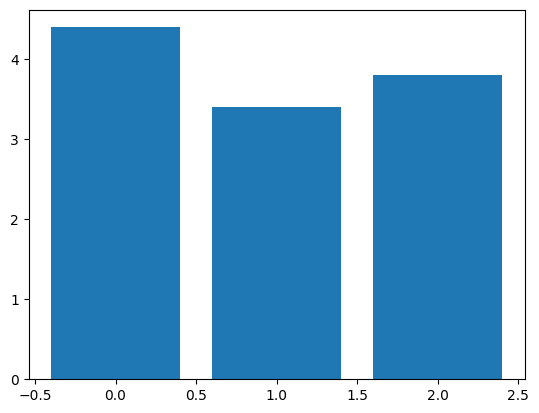

In [22]:
plt.bar(df["target"],df["sepal width (cm)"])

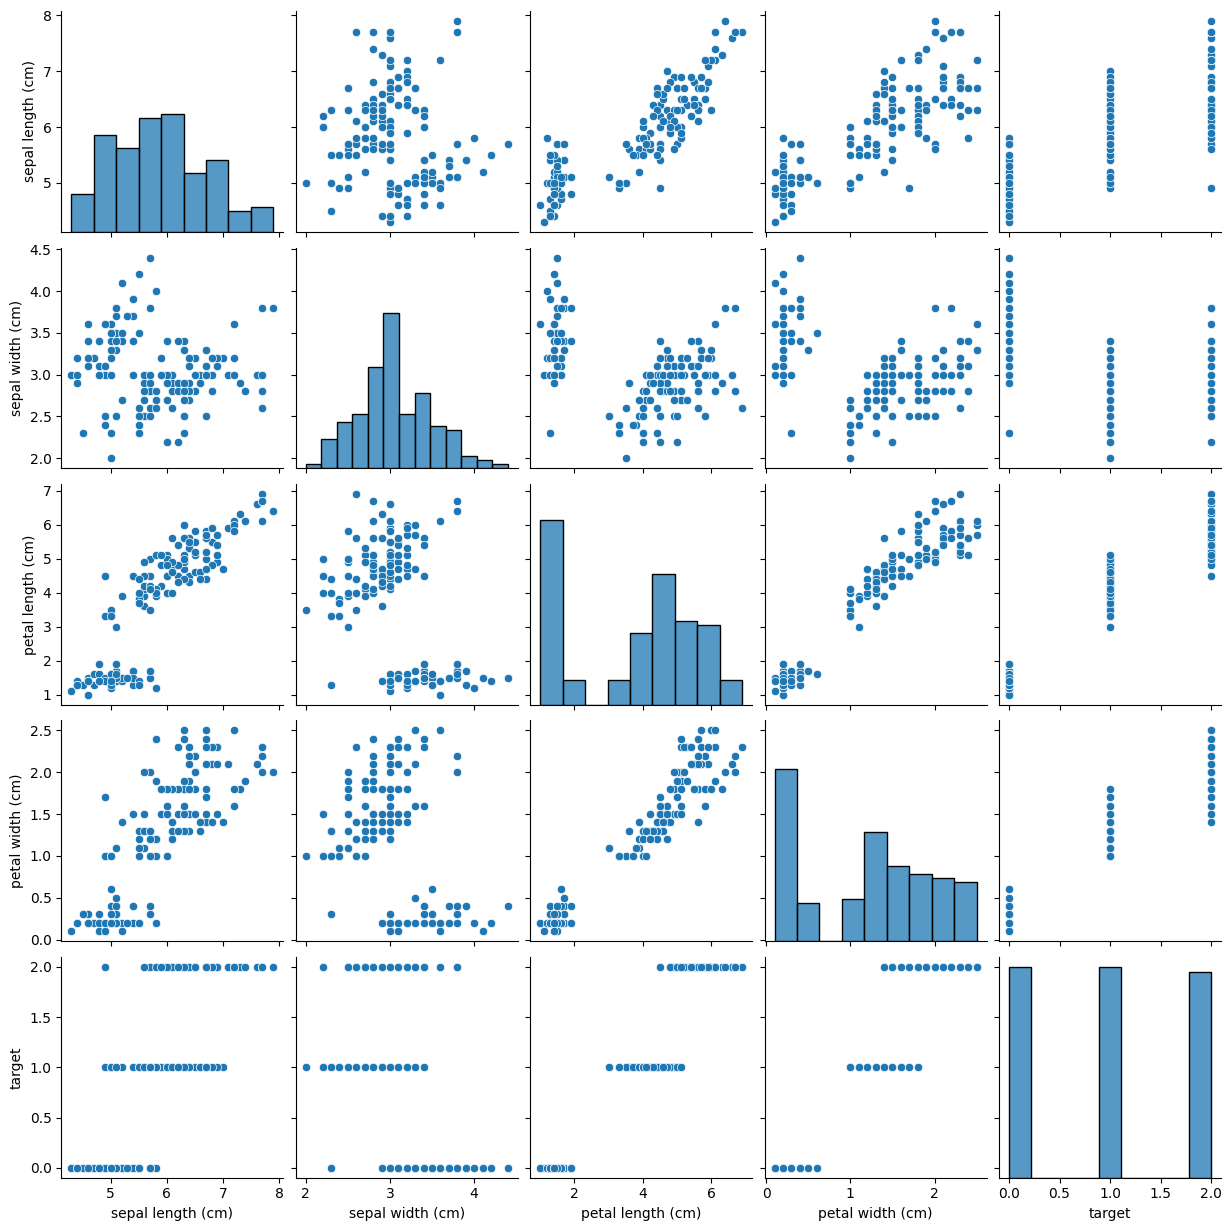

In [23]:
sns.pairplot(data=df)

In [24]:
df["flower name"]=df.target.apply(lambda x:data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]
df0.shape,df1.shape,df2.shape,df.shape

((50, 6), (50, 6), (49, 6), (149, 6))

In [26]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df0.shape,df1.shape,df2.shape,df.shape

((50, 6), (50, 6), (49, 6), (149, 6))

In [27]:
x=df.drop(["target","flower name"],axis=1)
y=df["target"]
x.shape,y.shape

((149, 4), (149,))

train test splitting

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,train_size=0.85)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((126, 4), (23, 4), (126,), (23,))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled

array([[-8.85981769e-01,  9.78492759e-01, -1.26710318e+00,
        -1.11044152e+00],
       [-2.55282883e-01, -3.99050120e-01, -2.20092364e-02,
         1.99629936e-01],
       [-1.29143105e-01,  1.66726420e+00, -1.09731765e+00,
        -1.11044152e+00],
       [-1.89509999e+00, -1.69459640e-01, -1.43688872e+00,
        -1.37245581e+00],
       [ 8.79975113e-01, -1.69459640e-01,  1.05329917e+00,
         8.54665663e-01],
       [-1.13826132e+00,  6.01308400e-02, -1.21050800e+00,
        -1.37245581e+00],
       [-3.81422660e-01, -1.54700252e+00,  3.45859430e-02,
        -1.93391500e-01],
       [ 2.49276226e-01, -2.00618348e+00,  2.04371481e-01,
        -1.93391500e-01],
       [-8.85981769e-01,  5.19311800e-01, -1.09731765e+00,
        -8.48427228e-01],
       [-1.01212155e+00,  7.48902279e-01, -1.15391283e+00,
        -9.79434373e-01],
       [-6.33702214e-01,  1.43767372e+00, -1.21050800e+00,
        -1.24144866e+00],
       [-1.39054088e+00,  2.89721320e-01, -1.32369836e+00,
      

In [30]:
from pyexpat import model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(x_train_scaled,y_train)
y_predict_lin=model_lin.predict(x_test)
print(r2_score(y_predict_lin,y_test))

-2.0132228941432038


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_scaled,y_train)
y_predict=model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_predict,y_test))
print(confusion_matrix(y_predict,y_test))
print(classification_report(y_predict,y_test))

1.0
[[ 4  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [32]:
model1=SVC()
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)
print(accuracy_score(y_predict1,y_test))
print(confusion_matrix(y_predict1,y_test))
print(classification_report(y_predict1,y_test))

1.0
[[ 4  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [33]:
model_c=SVC(C=1)
model_c.fit(x_train_scaled,y_train)
model_c.score(x_test_scaled,y_test)

1.0

In [34]:
model_g=SVC(gamma=10)
model_g.fit(x_train_scaled,y_train)
model_g.score(x_test_scaled,y_test)

0.8695652173913043

kernals

In [35]:
model_k=SVC(kernel="poly")
model_k.fit(x_train_scaled,y_train)
model_k.score(x_test_scaled,y_test)

0.9565217391304348

In [36]:
model_k=SVC(kernel="rbf")
model_k.fit(x_train_scaled,y_train)
model_k.score(x_test_scaled,y_test)

1.0

In [37]:
model_k=SVC(kernel="linear")
model_k.fit(x_train_scaled,y_train)
model_k.score(x_test_scaled,y_test)

1.0